In [2]:
import numpy as np
import pandas as pd

In [3]:

recipes = pd.read_json('recipeitems.json', lines = True)
recipes.shape

(173278, 17)

In [4]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [5]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [6]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [7]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [8]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [9]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

In [11]:
import pandas as pd
import re  # Importing the regular expression module

# Define a list of common spices
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

# Creating a DataFrame to check which spices are present in each recipe's ingredients
spice_df = pd.DataFrame({
    spice: recipes.ingredients.str.contains(spice, flags=re.IGNORECASE, na=False)
    for spice in spice_list
})

# Display the first few rows of the resulting DataFrame
spice_df.head()


,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,True,True,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [12]:
selection = spice_df.query('parsley & paprika & tarragon')
print(len(selection))


12


In [13]:
print(recipes.name[selection.index])


2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
162896                       Moroccan Chicken over Couscous
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
171774                             Fiskefilet med Remoulade
Name: name, dtype: object


[*********************100%***********************]  1 of 1 completed


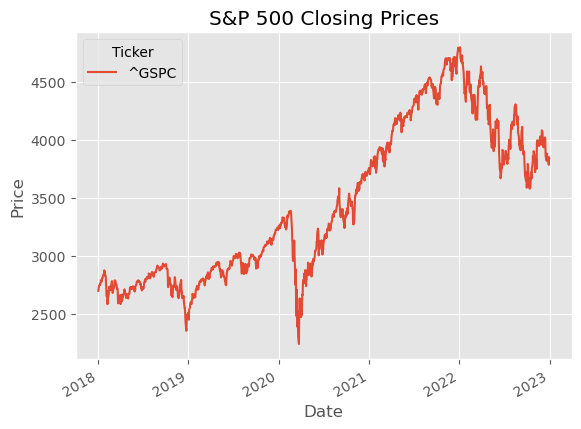

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load S&P 500 data from Yahoo Finance
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31')

# Use only the closing price
sp500 = sp500['Close']

# Plot the closing price
plt.style.use('ggplot')
sp500.plot(title='S&P 500 Closing Prices')
plt.ylabel('Price')
plt.show()


In [8]:
# Downsampling to Business Year (BA) frequency and calculating the mean
sp500_resampled = sp500.resample('BYE').mean()
print(sp500_resampled.head())


Ticker            ^GSPC
Date                   
2018-12-31  2746.214183
2019-12-31  2913.356380
2020-12-31  3217.855849
2021-12-31  4273.385635
2022-12-30  4098.514748


In [7]:
# Selecting the closing price at Business Year frequency
sp500_asfreq = sp500.asfreq('BYE')
print(sp500_asfreq.head())


Ticker            ^GSPC
Date                   
2018-12-31  2506.850098
2019-12-31  3230.780029
2020-12-31  3756.070068
2021-12-31  4766.180176
2022-12-30  3839.500000


<Figure size 1000x500 with 0 Axes>

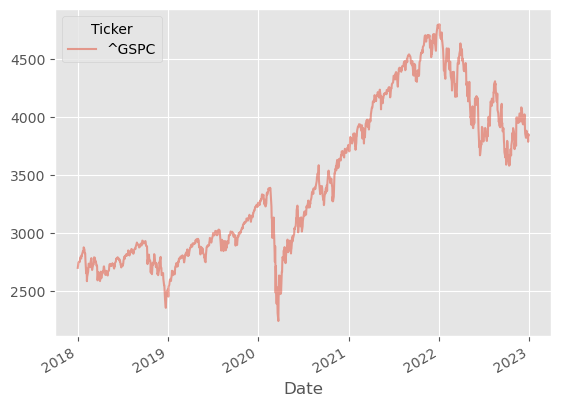

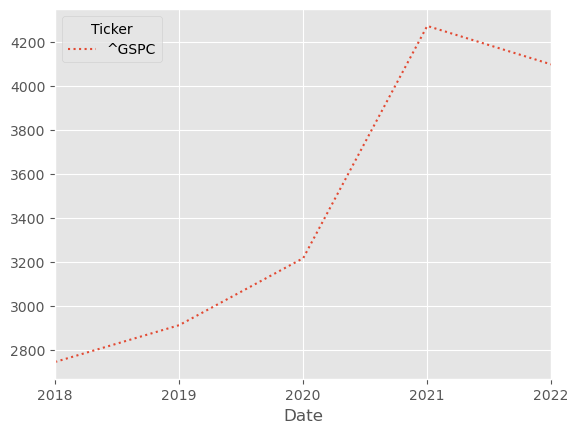

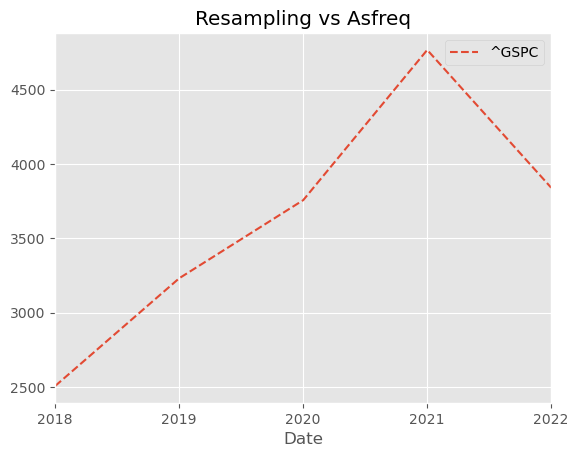

In [6]:
# Plotting resampling vs asfreq
plt.figure(figsize=(10, 5))
sp500.plot(alpha=0.5, style='-', label='Original Data')
sp500.resample('BYE').mean().plot(style=':', label='Resampled (Mean)')
sp500.asfreq('BYE').plot(style='--', label='Asfreq (Year-End)')
plt.legend()
plt.title('Resampling vs Asfreq')
plt.show()


In [9]:
# Shifting data by one year
shifted = sp500.shift(365)
print(shifted.head())


Ticker      ^GSPC
Date             
2018-01-02    NaN
2018-01-03    NaN
2018-01-04    NaN
2018-01-05    NaN
2018-01-08    NaN


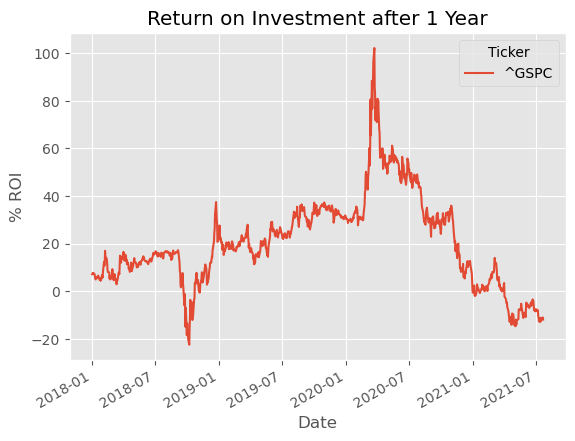

In [10]:
# Calculating one-year return on investment (ROI)
ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot(title='Return on Investment after 1 Year', ylabel='% ROI')
plt.show()


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load S&P 500 data from Yahoo Finance
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31')

# Use only the closing price
sp500 = sp500['Close']

# Calculate rolling statistics (1-year window with center alignment)
rolling_mean = sp500.rolling(window=365, center=True).mean()
rolling_median = sp500.rolling(window=365, center=True).median()

# Combine original and rolling statistics into a DataFrame
data = pd.DataFrame({
    'Original': sp500,
    'Rolling Mean': rolling_mean,
    'Rolling Median': rolling_median
})

# Drop NaN values from the entire DataFrame at once
data = data.dropna()

# Plotting the rolling statistics
plt.style.use('seaborn')
data.plot(title='Rolling Mean and Median (1-Year)', figsize=(10, 6))
plt.ylabel('Price')
plt.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index

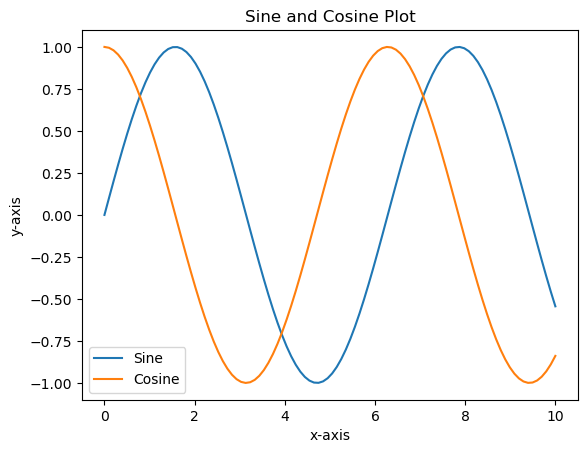

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), label="Sine")
plt.plot(x, np.cos(x), label="Cosine")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Sine and Cosine Plot")
plt.legend()
plt.show()


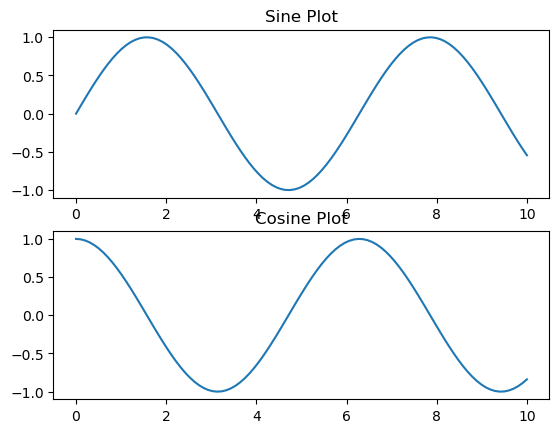

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

# Creating two subplots
plt.figure()
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(x, np.sin(x), label="Sine")
plt.title("Sine Plot")
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(x, np.cos(x), label="Cosine")
plt.title("Cosine Plot")

plt.show()


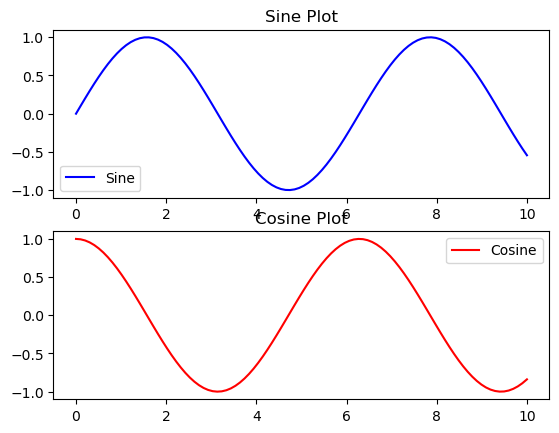

In [4]:
fig, ax = plt.subplots(2)  # Two subplots in one figure

# Plotting on the first subplot
ax[0].plot(x, np.sin(x), label="Sine", color="blue")
ax[0].set_title("Sine Plot")
ax[0].legend()

# Plotting on the second subplot
ax[1].plot(x, np.cos(x), label="Cosine", color="red")
ax[1].set_title("Cosine Plot")
ax[1].legend()

plt.show()


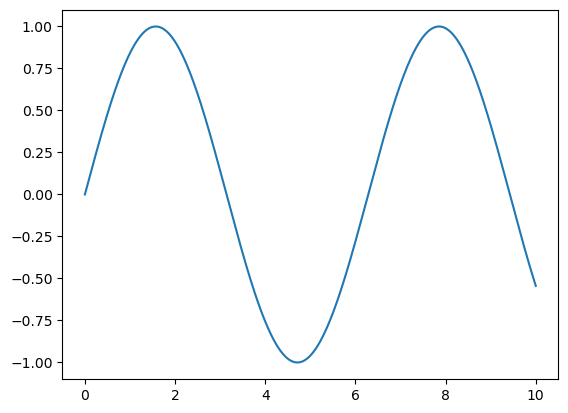

In [8]:
# Create figure and axes
fig = plt.figure()
ax = plt.axes()

# Generate data
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Plot the data
ax.plot(x, y)

# Display the plot
plt.show()


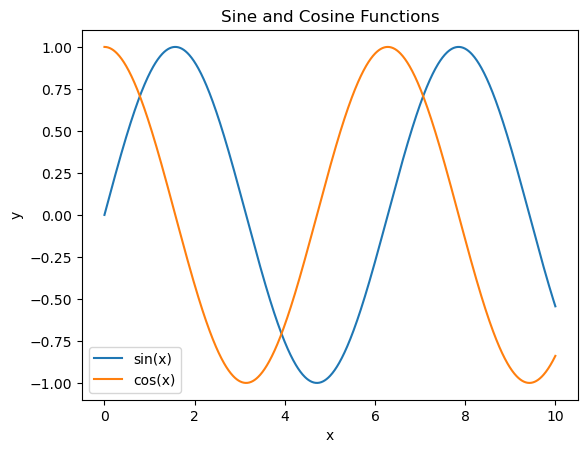

In [9]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.title("Sine and Cosine Functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


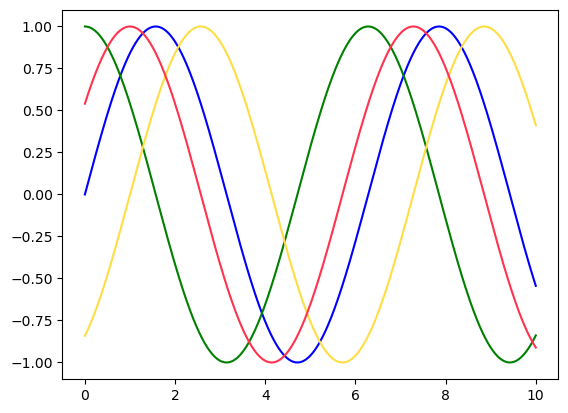

In [10]:
plt.plot(x, np.sin(x), color='blue')      # Name
plt.plot(x, np.cos(x), color='g')          # Short code
plt.plot(x, np.sin(x - 1), color='#FFDD44') # Hex code
plt.plot(x, np.cos(x - 1), color=(1.0, 0.2, 0.3)) # RGB
plt.show()


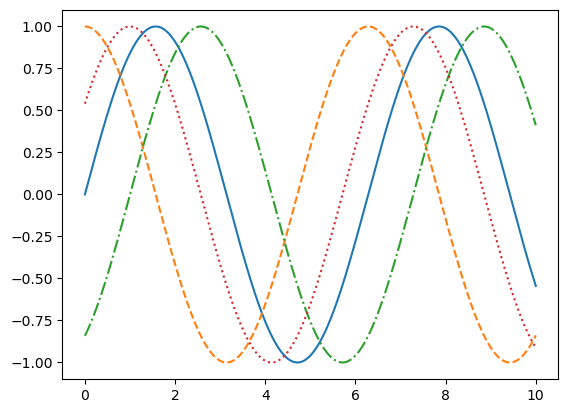

In [11]:
plt.plot(x, np.sin(x), linestyle='solid')   # Solid line
plt.plot(x, np.cos(x), linestyle='dashed')  # Dashed line
plt.plot(x, np.sin(x - 1), linestyle='dashdot') # Dash-dot line
plt.plot(x, np.cos(x - 1), linestyle='dotted')  # Dotted line
plt.show()


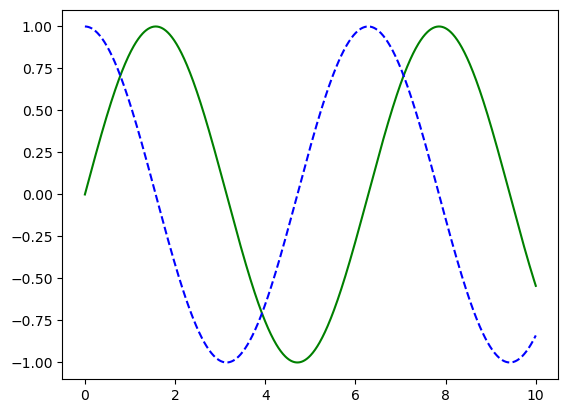

In [12]:
plt.plot(x, np.sin(x), '-g')   # Green solid line
plt.plot(x, np.cos(x), '--b')  # Blue dashed line
plt.show()


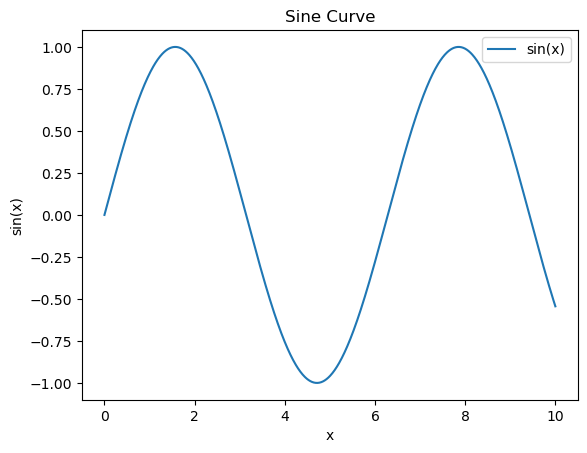

In [13]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.title("Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()


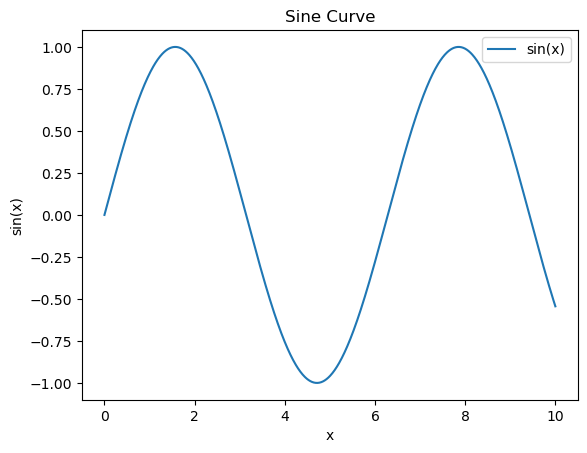

In [14]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin(x)')
ax.set_title("Sine Curve")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.legend()
plt.show()


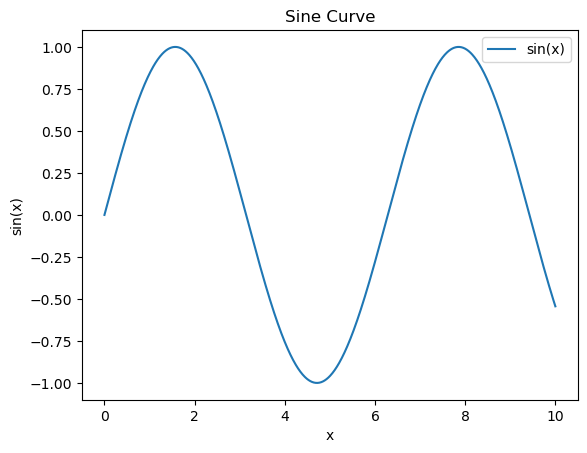

In [15]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin(x)')
ax.set_title("Sine Curve")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.legend()
plt.show()


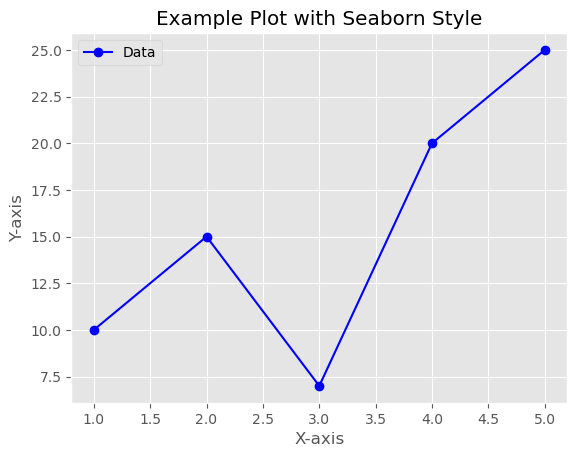

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid Seaborn style
plt.style.use('ggplot')

# Example plot
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 20, 25]
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Data')
plt.title("Example Plot with Seaborn Style")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


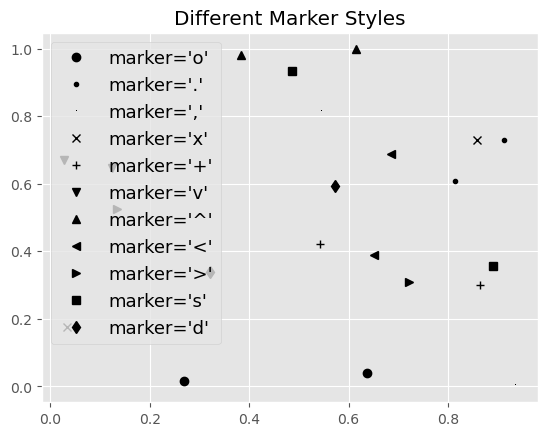

In [4]:
rng = np.random.default_rng(0)

# Demonstrating various markers
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black', label=f"marker='{marker}'")

plt.legend(numpoints=1, fontsize=13)
plt.title("Different Marker Styles")
plt.show()


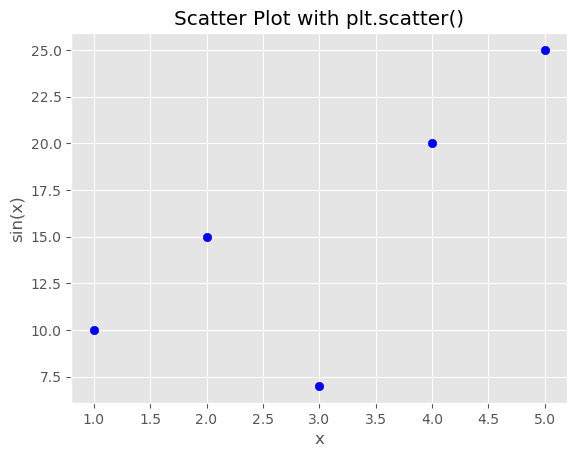

In [5]:
plt.scatter(x, y, marker='o', color='blue')
plt.title("Scatter Plot with plt.scatter()")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()


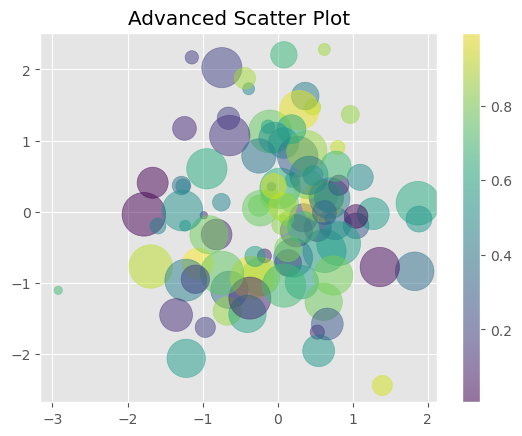

In [6]:
# Generating random data
x = np.random.randn(100)
y = np.random.randn(100)
sizes = 1000 * np.random.rand(100)  # Bubble sizes
colors = np.random.rand(100)  # Color mapping

# Creating the scatter plot
plt.scatter(x, y, s=sizes, c=colors, alpha=0.5, cmap='viridis')
plt.colorbar()  # Display color scale
plt.title("Advanced Scatter Plot")
plt.show()


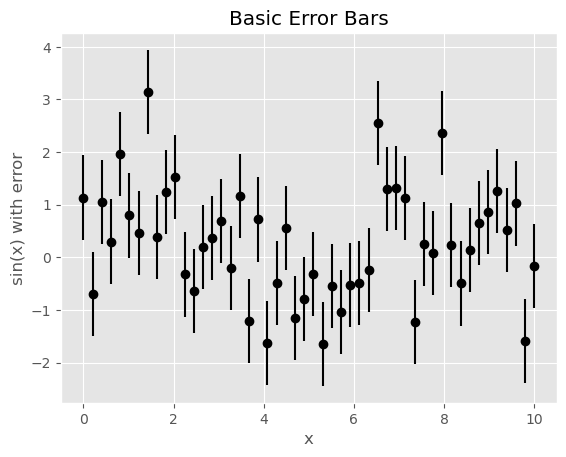

In [7]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black')
plt.title("Basic Error Bars")
plt.xlabel("x")
plt.ylabel("sin(x) with error")
plt.show()


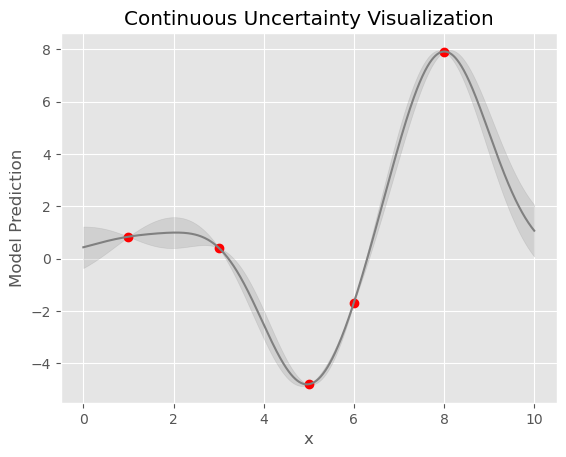

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Define a simple model and data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Gaussian Process Regression
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

# Prediction with uncertainty
xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

# Plotting the results
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.title("Continuous Uncertainty Visualization")
plt.xlabel("x")
plt.ylabel("Model Prediction")
plt.show()


In [9]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


In [10]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


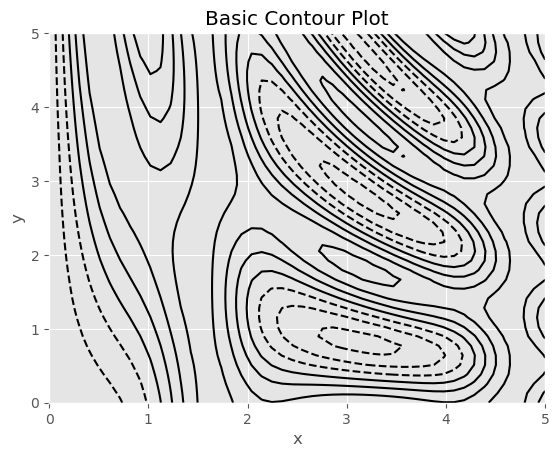

In [11]:
plt.contour(X, Y, Z, colors='black')
plt.title("Basic Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


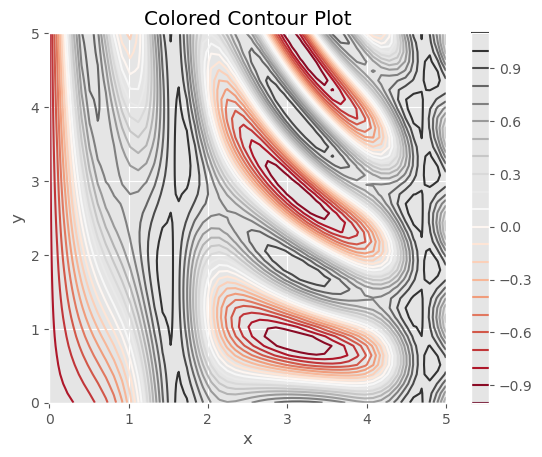

In [12]:
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.title("Colored Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


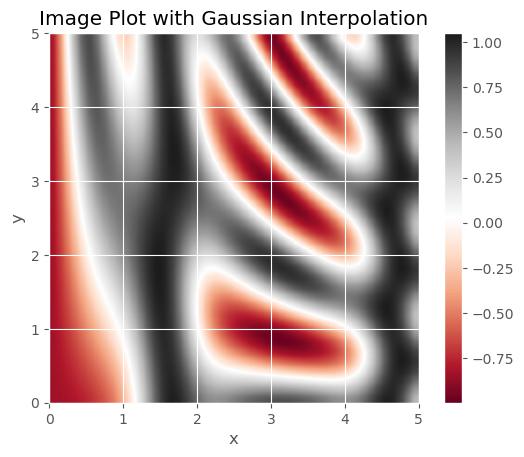

In [13]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', interpolation='gaussian', aspect='equal')
plt.colorbar()
plt.title("Image Plot with Gaussian Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


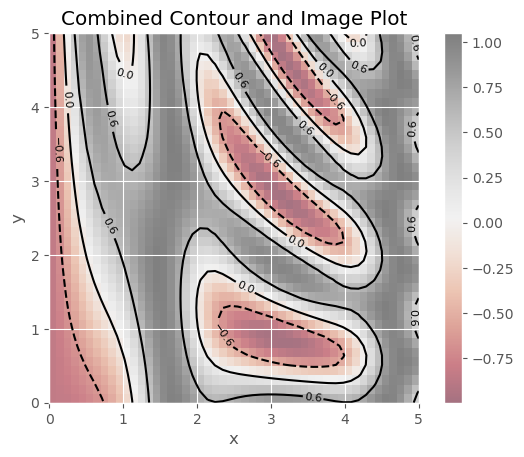

In [14]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar()
plt.title("Combined Contour and Image Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


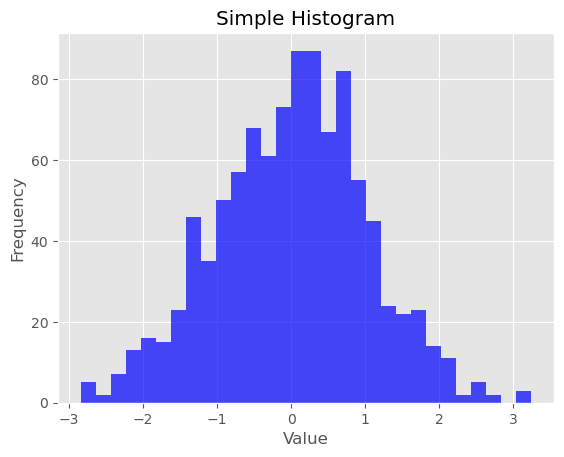

In [15]:
data = np.random.randn(1000)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title("Simple Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


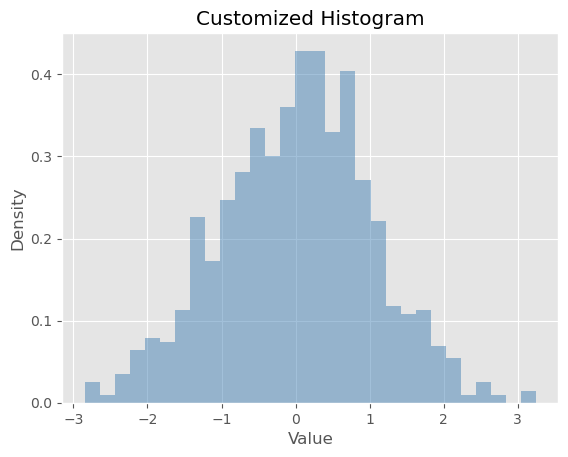

In [16]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
plt.title("Customized Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


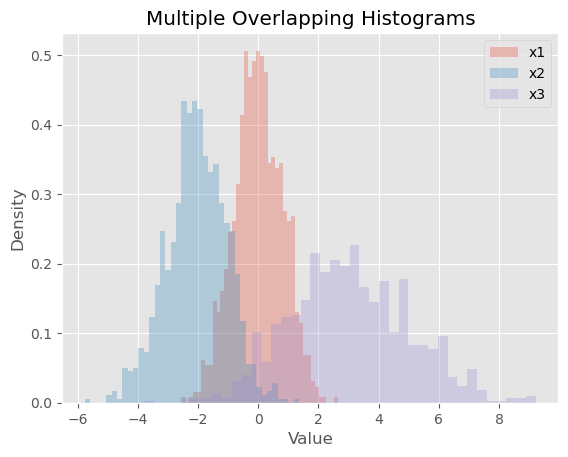

In [17]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs, label='x1')
plt.hist(x2, **kwargs, label='x2')
plt.hist(x3, **kwargs, label='x3')
plt.title("Multiple Overlapping Histograms")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


ValueError: x and y must have the same length.

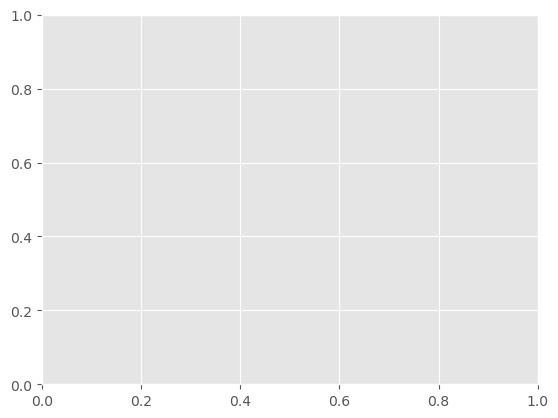

In [18]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar(label='Counts in Bin')
plt.title("2D Histogram")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [19]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print("Shape of counts:", counts.shape)


ValueError: x and y must have the same length.

ValueError: operands could not be broadcast together with shapes (50,) (40,) 

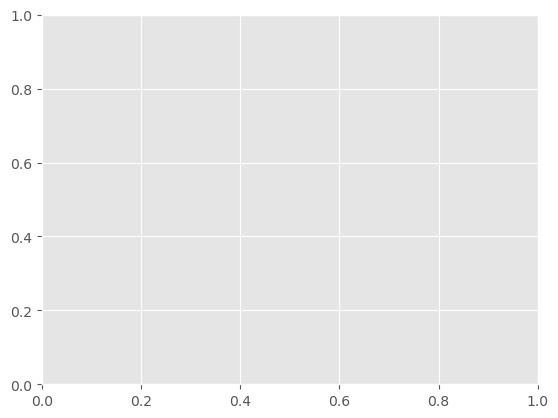

In [20]:
plt.hexbin(x, y, gridsize=30, cmap='Purples')
cb = plt.colorbar(label='Count in Bin')
plt.title("Hexagonal Binning")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [21]:
from scipy.stats import gaussian_kde

# Combining the data into a single array
data = np.vstack([x, y])

# Performing Gaussian KDE
kde = gaussian_kde(data)

# Defining the grid for plotting
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

# Evaluating the KDE on the grid
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plotting the KDE result
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar(label="Density")
plt.title("Kernel Density Estimation (KDE)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 50 and the array at index 1 has size 40

In [1]:
 import matplotlib.pyplot as plt
 plt.style.use('ggplot')

 import numpy as np

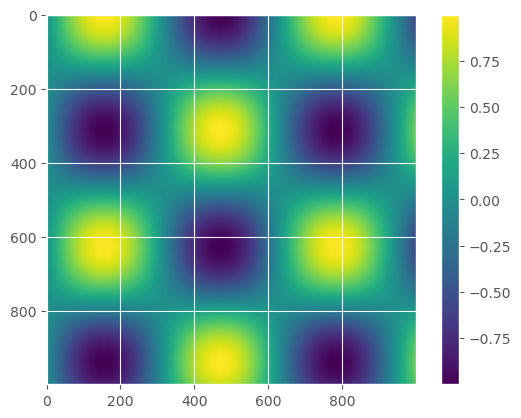

In [2]:
 x = np.linspace(0, 10, 1000)
 I = np.sin(x) * np.cos(x[:, np.newaxis])
 plt.imshow(I)
 plt.colorbar();

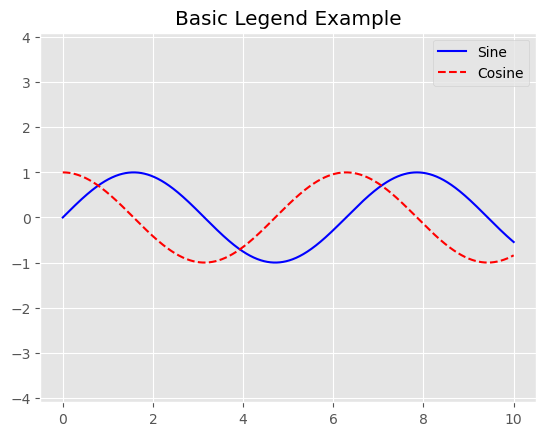

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')

ax.legend()
plt.title("Basic Legend Example")
plt.show()


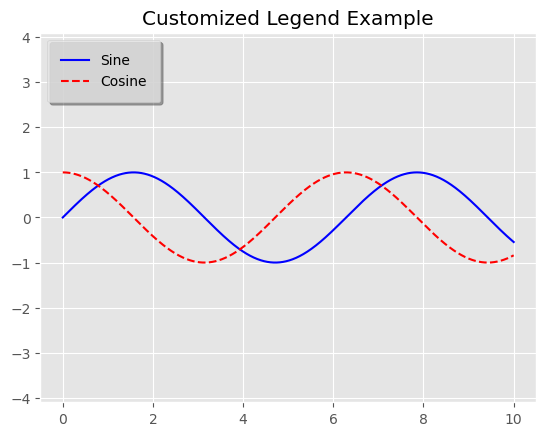

In [4]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')

ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, framealpha=0.8, borderpad=1)
plt.title("Customized Legend Example")
plt.show()


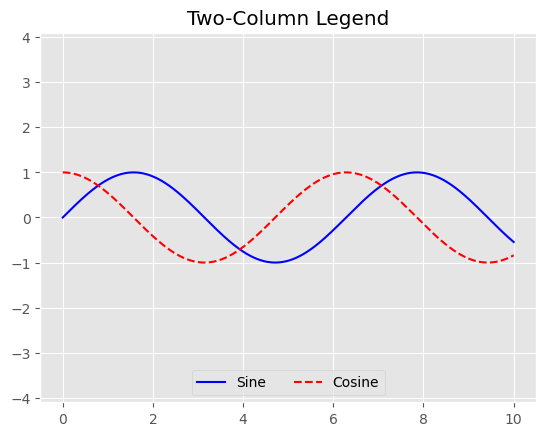

In [5]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')

ax.legend(loc='lower center', ncol=2, frameon=True)
plt.title("Two-Column Legend")
plt.show()


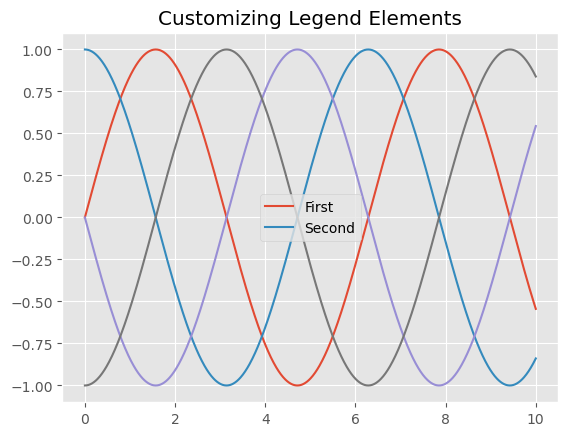

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# Customize which lines to include in the legend
plt.legend(lines[:2], ['First', 'Second'], frameon=True)
plt.title("Customizing Legend Elements")
plt.show()


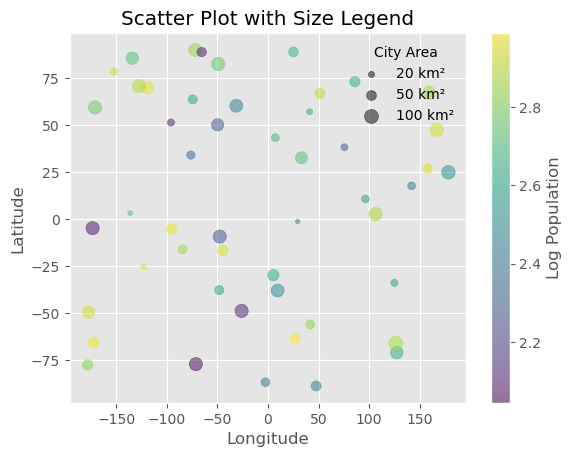

In [7]:
# Generating random data for demonstration
population = np.random.randint(100, 1000, size=50)
area = np.random.randint(10, 100, size=50)
lat = np.random.uniform(-90, 90, size=50)
lon = np.random.uniform(-180, 180, size=50)

plt.scatter(lon, lat, c=np.log10(population), s=area, alpha=0.5, cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Log Population')

# Creating a size-based legend
for size in [20, 50, 100]:
    plt.scatter([], [], c='k', alpha=0.5, s=size, label=f'{size} km²')

plt.legend(scatterpoints=1, frameon=False, title="City Area")
plt.title("Scatter Plot with Size Legend")
plt.show()


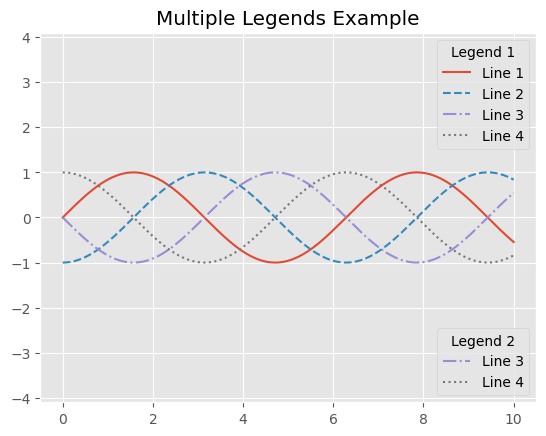

In [8]:
fig, ax = plt.subplots()
styles = ['-', '--', '-.', ':']

# Creating four different lines
for i, style in enumerate(styles):
    ax.plot(x, np.sin(x - i * np.pi / 2), style, label=f'Line {i+1}')

ax.axis('equal')

# First legend
legend1 = ax.legend(loc='upper right', title="Legend 1")

# Adding a second legend manually
from matplotlib.legend import Legend
legend2 = Legend(ax, [ax.lines[2], ax.lines[3]], ['Line 3', 'Line 4'], loc='lower right', title="Legend 2")
ax.add_artist(legend2)

plt.title("Multiple Legends Example")
plt.show()


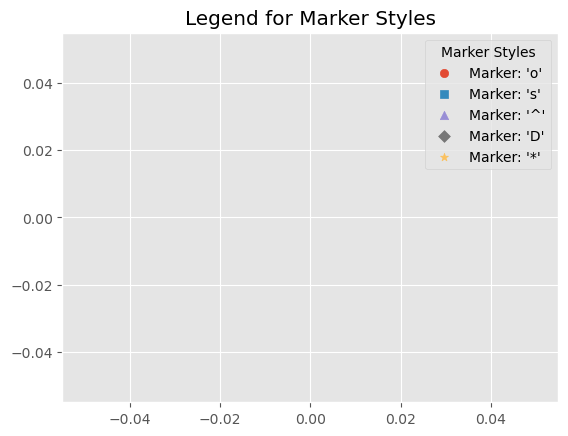

In [9]:
markers = ['o', 's', '^', 'D', '*']
for marker in markers:
    plt.scatter([], [], marker=marker, label=f"Marker: '{marker}'")

plt.legend(scatterpoints=1, frameon=True, title="Marker Styles")
plt.title("Legend for Marker Styles")
plt.show()


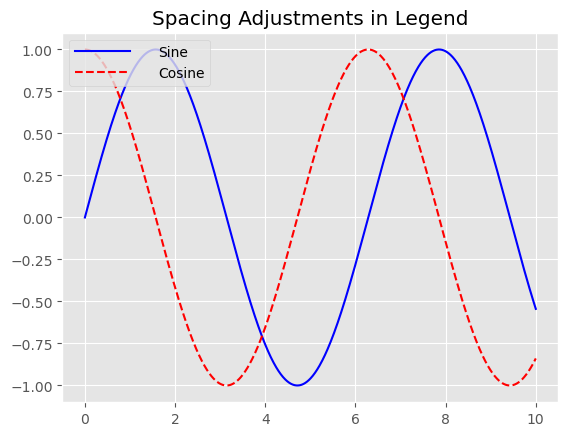

In [10]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')

ax.legend(loc='upper left', handlelength=4, handletextpad=2, frameon=True)
plt.title("Spacing Adjustments in Legend")
plt.show()


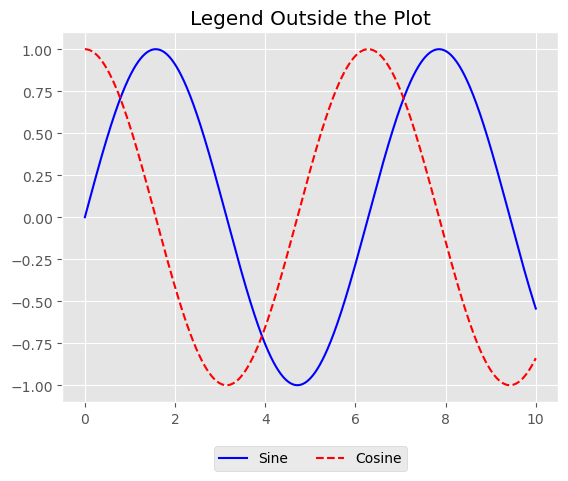

In [11]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title("Legend Outside the Plot")
plt.show()


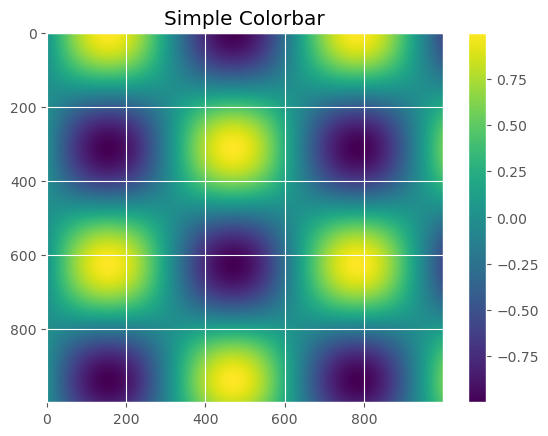

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

# Display the data with a colorbar
plt.imshow(I, aspect='auto')
plt.colorbar()
plt.title("Simple Colorbar")
plt.show()


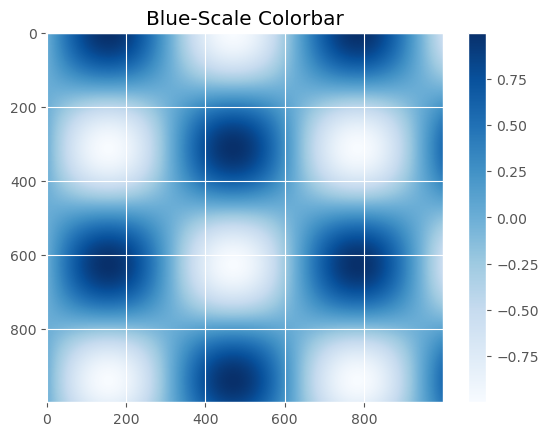

In [13]:
plt.imshow(I, cmap='Blues', aspect='auto')
plt.colorbar()
plt.title("Blue-Scale Colorbar")
plt.show()


C:\Users\MR.CRIMINAL\AppData\Local\Temp\ipykernel_16816\3241487849.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, 256))
C:\Users\MR.CRIMINAL\AppData\Local\Temp\ipykernel_16816\3241487849.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  grayscale = plt.cm.get_cmap(cmap)(np.linspace(0, 1, 256))


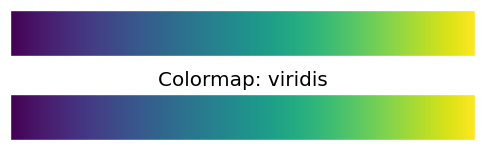

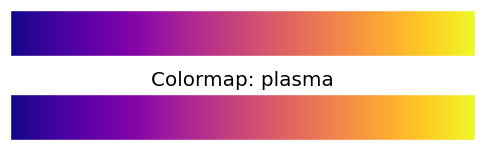

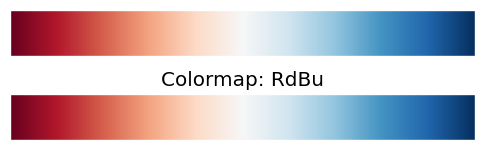

In [14]:
from matplotlib.colors import LinearSegmentedColormap

def view_colormap(cmap):
    """Visualize a colormap with its grayscale equivalent"""
    colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, 256))
    grayscale = plt.cm.get_cmap(cmap)(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw={'xticks': [], 'yticks': []})
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])
    plt.title(f"Colormap: {cmap}")
    plt.show()

# View a few colormaps
view_colormap('viridis')
view_colormap('plasma')
view_colormap('RdBu')


C:\Users\MR.CRIMINAL\AppData\Local\Temp\ipykernel_16816\484020352.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


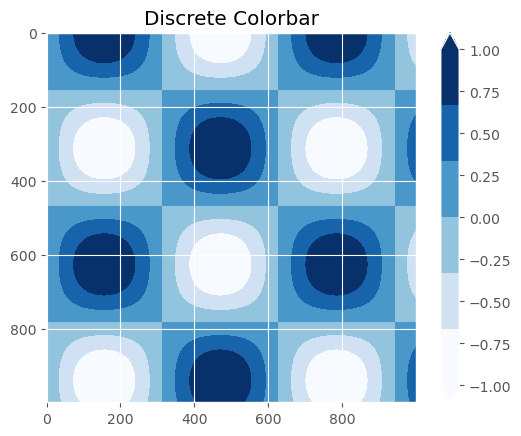

In [15]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1)
plt.title("Discrete Colorbar")
plt.show()


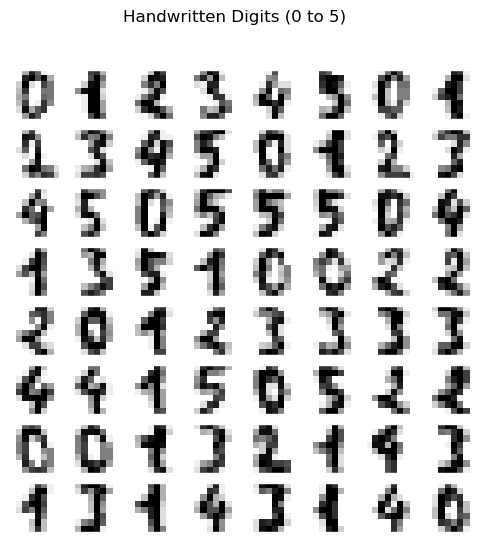

In [16]:
from sklearn.datasets import load_digits

# Load digits data (digits from 0 to 5)
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

plt.suptitle("Handwritten Digits (0 to 5)")
plt.show()


C:\Users\MR.CRIMINAL\AppData\Local\Temp\ipykernel_16816\1792398065.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projection[:, 0], projection[:, 1], c=digits.target, cmap=plt.cm.get_cmap('plasma', 6), edgecolor='k')


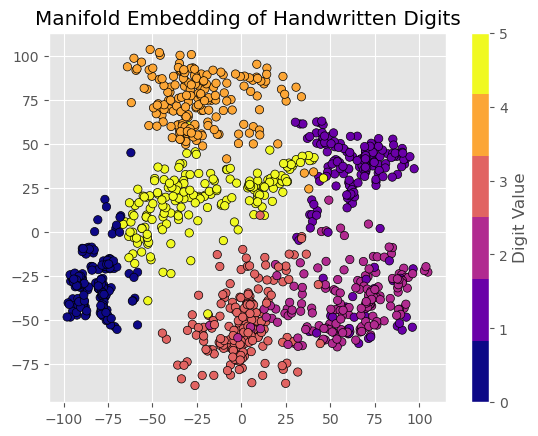

In [17]:
from sklearn.manifold import Isomap

# Reduce dimensions using Isomap
iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)

# Scatter plot with a discrete colormap
plt.scatter(projection[:, 0], projection[:, 1], c=digits.target, cmap=plt.cm.get_cmap('plasma', 6), edgecolor='k')
plt.colorbar(ticks=range(6), label='Digit Value')
plt.title("Manifold Embedding of Handwritten Digits")
plt.show()
